In [26]:
import sys
sys.path.append("..")


# load the triangles into the efficient encoding structure 
# (there is a numpy based version of this, which we should use in future)
from tribarmes import TriangleBarMesh
fname = "../stlsamples/twocups.stl"
tbm = TriangleBarMesh(fname)

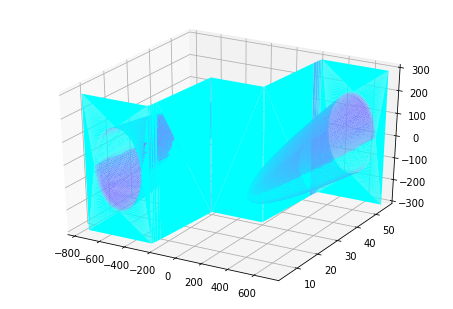

In [27]:
# Quick and dirty plot of this triangle mesh in 3D 
%matplotlib inline

from basicgeo import P3

from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

fig = plt.figure()
axes = mplot3d.Axes3D(fig)

vs = tbm.GetBarMeshTriangles()
cs = mplot3d.art3d.Poly3DCollection(vs)

# need to shade the triangles according to normal vectors
cm = plt.get_cmap('cool')
def col(t):
    n = P3.ZNorm(P3.Cross(t[1]-t[0], t[2]-t[0]))
    if n[2] < 0:
        n = -n
    return cm(n[2]*0.8 + n[0]*0.6)
cs.set_facecolor([col(t)  for t in vs])

axes.auto_scale_xyz([t[0][0]  for t in vs], [t[0][1]  for t in vs], [t[0][2]  for t in vs])
axes.add_collection3d(cs)
plt.show()

In [29]:
x = np.array(list(n.p.x  for n in tbm.nodes))
y = np.array(list(n.p.y  for n in tbm.nodes))
z = np.array(list(n.p.z  for n in tbm.nodes))
triangles = [ ]
for bar in tbm.bars:
    if bar.barforeright:
        node2 = bar.barforeright.GetNodeFore(bar.nodefore == bar.barforeright.nodeback)
        if node2.i > bar.nodeback.i:
            node0 = bar.nodeback
            node1 = bar.nodefore
            triangles.append((node0.i, node1.i, node2.i))


In [30]:
ipv.figure()
mesh = ipv.plot_trisurf(x, y, z, triangles=triangles, color='orange')
ipv.xyzlim(-800, 800)
ipv.show()
